In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Import necessary libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Globally setting print options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load dataset

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,SEQN,Little interest in doing things,Feeling down or depressed,Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,total_score,No of hours you sleep,How_often do you snore,How_often do you snort/stop breathing,trouble sleeping,Sleep_Apnea,Blood_pressure,Taking Medication for HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Race,Education Level,Marital Status,Pregnant,PIR,depression_category
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0,0,2,85,NaN,Some College/AA degree,Divorced/Widowed/Separated,NaN,1.99,No Depression
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,NaN,Some College/AA degree,Married/Living with Partner,0.0,4.65,No Depression
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0,3.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0,0,1,70,NaN,> College Graduate,Married/Living with Partner,NaN,5.00,No Depression
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,NaN,High School Graduate,Married/Living with Partner,NaN,NaN,No Depression
4,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0,0,1,21,NaN,High School Graduate,Never Married,NaN,0.46,No Depression


### Basic data understanding

In [ ]:
df.shape

(24498, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24498 entries, 0 to 24497
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SEQN                                   24498 non-null  int64  
 1   Little interest in doing things        22349 non-null  float64
 2   Feeling down or depressed              22346 non-null  float64
 3   Trouble sleeping or sleeping too much  22346 non-null  float64
 4   Feeling tired or having little energy  22343 non-null  float64
 5   Poor appetite or overeating            22343 non-null  float64
 6   Feeling bad about yourself             22342 non-null  float64
 7   Trouble concentrating on things        22341 non-null  float64
 8   Moving or speaking slowly or too fast  22341 non-null  float64
 9   Thought you would be better off dead   22338 non-null  float64
 10  total_score                            24498 non-null  int64  
 11  No

In [ ]:
# Check for duplicates

df.duplicated().sum()

0

In [ ]:
# Rename column names

df.columns = df.columns.str.replace(' ', '_')

In [ ]:
continous_columns = ['No_of_hours_you_sleep', 'Age', 'PIR']

In [ ]:
# Columns that have discrete values (classes)

discrete_columns = ['Little_interest_in_doing_things', 'Feeling_down_or_depressed',
                       'Trouble_sleeping_or_sleeping_too_much', 'Feeling_tired_or_having_little_energy',
                       'Poor_appetite_or_overeating', 'Feeling_bad_about_yourself', 'Trouble_concentrating_on_things',
                       'Moving_or_speaking_slowly_or_too_fast', 'Thought_you_would_be_better_off_dead',
                       'How_often_do_you_snore', 'How_often_do_you_snort/stop_breathing', 'trouble_sleeping', 'Sleep_Apnea',
                       'Blood_pressure', 'Taking_Medication_for_HBP', 'current_drinker', 'past_drinker',
                       'current_smoker', 'past_smoker', 'Gender', 'Pregnant']

In [ ]:
# Categorical columns

cat_columns = ['Race', 'Education_Level', 'Marital_Status', 'depression_category']

In [ ]:
# Data statistics

df[continous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_hours_you_sleep,24377.0,7.283218,1.616074,1.0,6.00,7.00,8.00,14.5
Age,24498.0,50.015756,17.960930,20.0,34.00,50.00,64.00,85.0
PIR,21981.0,2.551894,1.609873,0.0,1.17,2.15,4.08,5.0


In [ ]:
# Drop insignificant columns
# total_score - calculated field to generate traget variable classes

df.drop(columns = ['SEQN','total_score'], axis=1, inplace=True)

In [ ]:
# Print value counts for all dicrete columns

for col in discrete_columns:
    print(df[col].value_counts())
    print()

Little_interest_in_doing_things
0.0    16879
1.0     3564
2.0     1057
3.0      804
9.0       35
7.0       10
Name: count, dtype: int64

Feeling_down_or_depressed
0.0    16846
1.0     3811
2.0      940
3.0      730
9.0       14
7.0        5
Name: count, dtype: int64

Trouble_sleeping_or_sleeping_too_much
0.0    13775
1.0     5045
3.0     1934
2.0     1570
9.0       18
7.0        4
Name: count, dtype: int64

Feeling_tired_or_having_little_energy
0.0    11109
1.0     7413
3.0     1924
2.0     1878
9.0       14
7.0        5
Name: count, dtype: int64

Poor_appetite_or_overeating
0.0    16893
1.0     3394
2.0     1046
3.0      993
9.0       15
7.0        2
Name: count, dtype: int64

Feeling_bad_about_yourself
0.0    18618
1.0     2508
2.0      620
3.0      567
9.0       25
7.0        4
Name: count, dtype: int64

Trouble_concentrating_on_things
0.0    18623
1.0     2388
3.0      671
2.0      642
9.0       15
7.0        2
Name: count, dtype: int64

Moving_or_speaking_slowly_or_too_fast
0.0   

In [ ]:
# Print value counts for all categorical columns

for col in cat_columns:
    print(df[col].value_counts())
    print()

Race
Non-Hispanic White    4723
Non-Hispanic Black    3452
Mexican American      1936
Other Hispanic        1613
Name: count, dtype: int64

Education_Level
Some College/AA degree    7211
High School Graduate      5799
> College Graduate        5451
9th-11th Grade            3327
< 9th Grade               2681
Name: count, dtype: int64

Marital_Status
Married/Living with Partner    14634
Divorced/Widowed/Separated      5479
Never Married                   4367
Name: count, dtype: int64

depression_category
No Depression        18883
Mild Depression       3384
Severe Depression     2231
Name: count, dtype: int64



In [ ]:
features = ['Little_interest_in_doing_things', 'Feeling_down_or_depressed',
            'Trouble_sleeping_or_sleeping_too_much', 'Feeling_tired_or_having_little_energy',
            'Poor_appetite_or_overeating', 'Feeling_bad_about_yourself',
            'Trouble_concentrating_on_things', 'Moving_or_speaking_slowly_or_too_fast','Thought_you_would_be_better_off_dead']

for feature in features:
    df.loc[df[feature].isin([7, 9]), feature] = np.nan

### Missing value imputation

In [ ]:
# Get count of missing values

missing_values = [(column, df[column].isnull().sum()) for column in df.columns]
missing_values_df = pd.DataFrame(missing_values, columns=['Column', 'MissingValues'])

In [ ]:
# Display columns with missing values

mv = missing_values_df[missing_values_df['MissingValues'] > 0]
mv

,Column,MissingValues
0,Little_interest_in_doing_things,2194
1,Feeling_down_or_depressed,2171
2,Trouble_sleeping_or_sleeping_too_much,2174
3,Feeling_tired_or_having_little_energy,2174
4,Poor_appetite_or_overeating,2172
5,Feeling_bad_about_yourself,2185
6,Trouble_concentrating_on_things,2174
7,Moving_or_speaking_slowly_or_too_fast,2183
8,Thought_you_would_be_better_off_dead,2178
9,No_of_hours_you_sleep,121


#### Continous feature missing value imputation

In [ ]:
df_imputed = df.copy()

##### Chose median as the imputation method as it's less affected by outliers

In [ ]:
df_imputed['PIR'] = df_imputed['PIR'].fillna(df_imputed['PIR'].median())
df_imputed['No_of_hours_you_sleep'] = df_imputed['No_of_hours_you_sleep'].fillna(df_imputed['No_of_hours_you_sleep'].median())

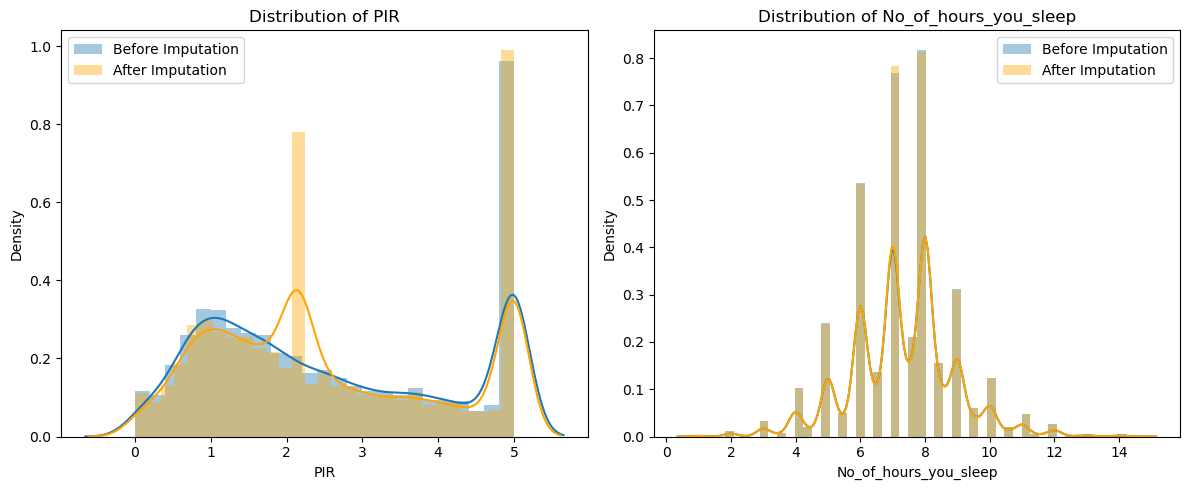

In [ ]:
# Distributions for PIR and No_of_hours_you_sleep before and after missing value imputation

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of 'PIR' column
sns.distplot(df['PIR'], ax=axs[0], label='Before Imputation')
sns.distplot(df_imputed['PIR'], ax=axs[0], color='orange', label='After Imputation')
axs[0].set_title('Distribution of PIR')
axs[0].set_xlabel('PIR')
axs[0].set_ylabel('Density')
axs[0].legend()

# Distribution of 'No_of_hours_you_sleep' column
sns.distplot(df['No_of_hours_you_sleep'], ax=axs[1], label='Before Imputation')
sns.distplot(df_imputed['No_of_hours_you_sleep'], ax=axs[1], color='orange', label='After Imputation')
axs[1].set_title('Distribution of No_of_hours_you_sleep')
axs[1].set_xlabel('No_of_hours_you_sleep')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Discrete feature missing value imputation

In [ ]:
# Columns that have discrete values (classes)

discrete_columns_mv = ['Little_interest_in_doing_things', 'Feeling_down_or_depressed',
                       'Trouble_sleeping_or_sleeping_too_much', 'Feeling_tired_or_having_little_energy',
                       'Poor_appetite_or_overeating', 'Feeling_bad_about_yourself', 'Trouble_concentrating_on_things',
                       'Moving_or_speaking_slowly_or_too_fast', 'Thought_you_would_be_better_off_dead',
                       'How_often_do_you_snore', 'How_often_do_you_snort/stop_breathing', 'trouble_sleeping', 'Sleep_Apnea',
                       'Blood_pressure', 'Taking_Medication_for_HBP', 'Pregnant']

In [ ]:
for col in discrete_columns_mv:
    mode_value = df[col].mode()[0]
    df_imputed[col].fillna(mode_value, inplace=True)

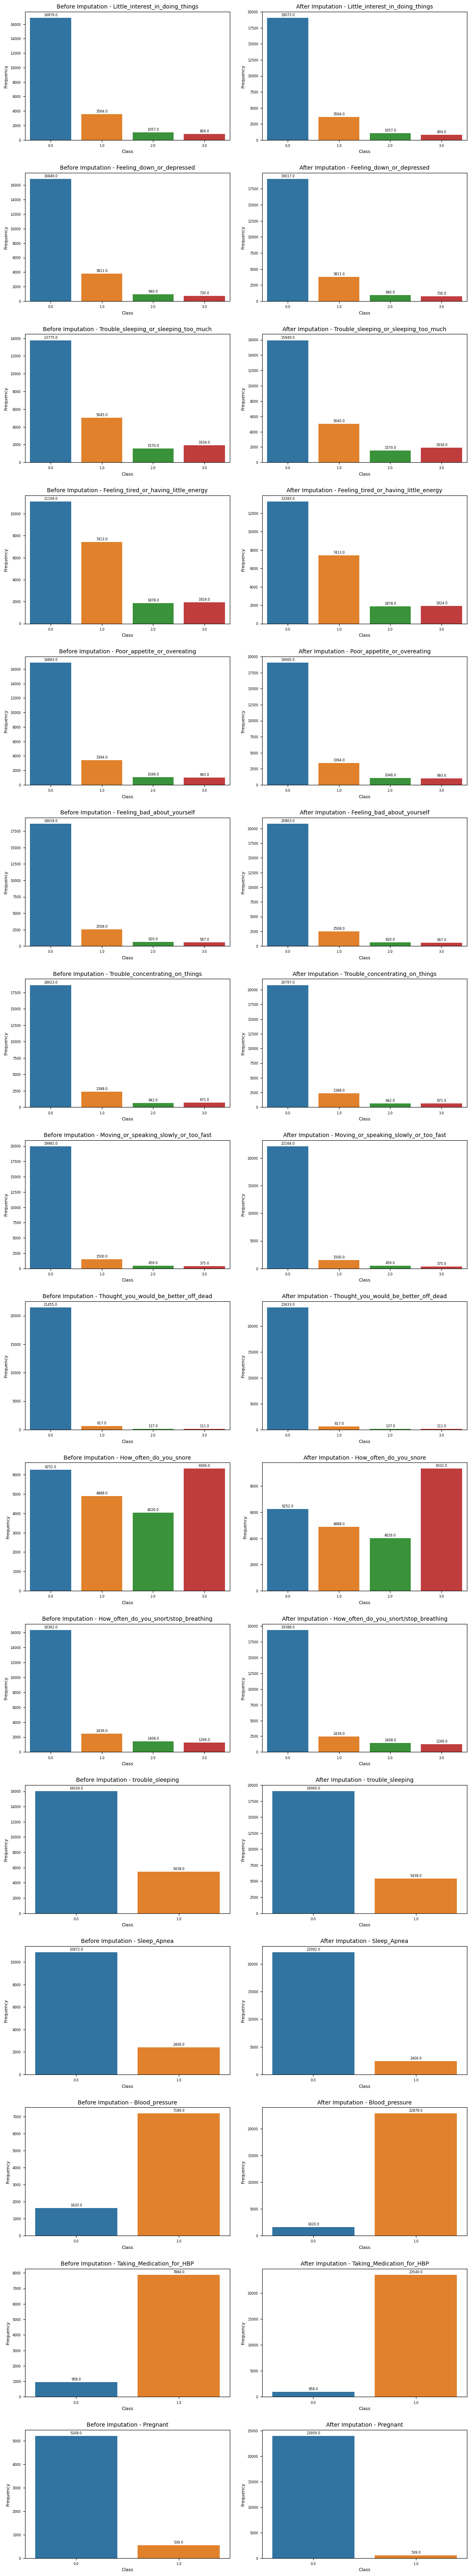

In [ ]:
# Bar plots for discrete features before and after missing value imputation

# Plotting
fig, axs = plt.subplots(len(discrete_columns_mv), 2, figsize=(12, len(discrete_columns_mv) * 4))

for col in discrete_columns_mv:
    i = discrete_columns_mv.index(col)

    # Bar plot before imputation
    sns.countplot(x=col, data=df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Before Imputation - {col}', fontsize=10)
    axs[i, 0].set_xlabel('Class', fontsize=8)
    axs[i, 0].set_ylabel('Frequency', fontsize=8)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=6)

    # Annotate each bar with its count
    for p in axs[i, 0].patches:
        axs[i, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=6)

    # Bar plot after imputation
    sns.countplot(x=col, data=df_imputed, ax=axs[i, 1])
    axs[i, 1].set_title(f'After Imputation - {col}', fontsize=10)
    axs[i, 1].set_xlabel('Class', fontsize=8)
    axs[i, 1].set_ylabel('Frequency', fontsize=8)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=6)

    # Annotate each bar with its count
    for p in axs[i, 1].patches:
        axs[i, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=6)

plt.subplots_adjust(hspace=0.5)

plt.tight_layout(pad=2.0)
plt.show()

#### Categorical feature missing vale imputation

In [ ]:
for col in cat_columns[:-1]:
    mode_value = df[col].mode()[0]
    df_imputed[col].fillna(mode_value, inplace=True)

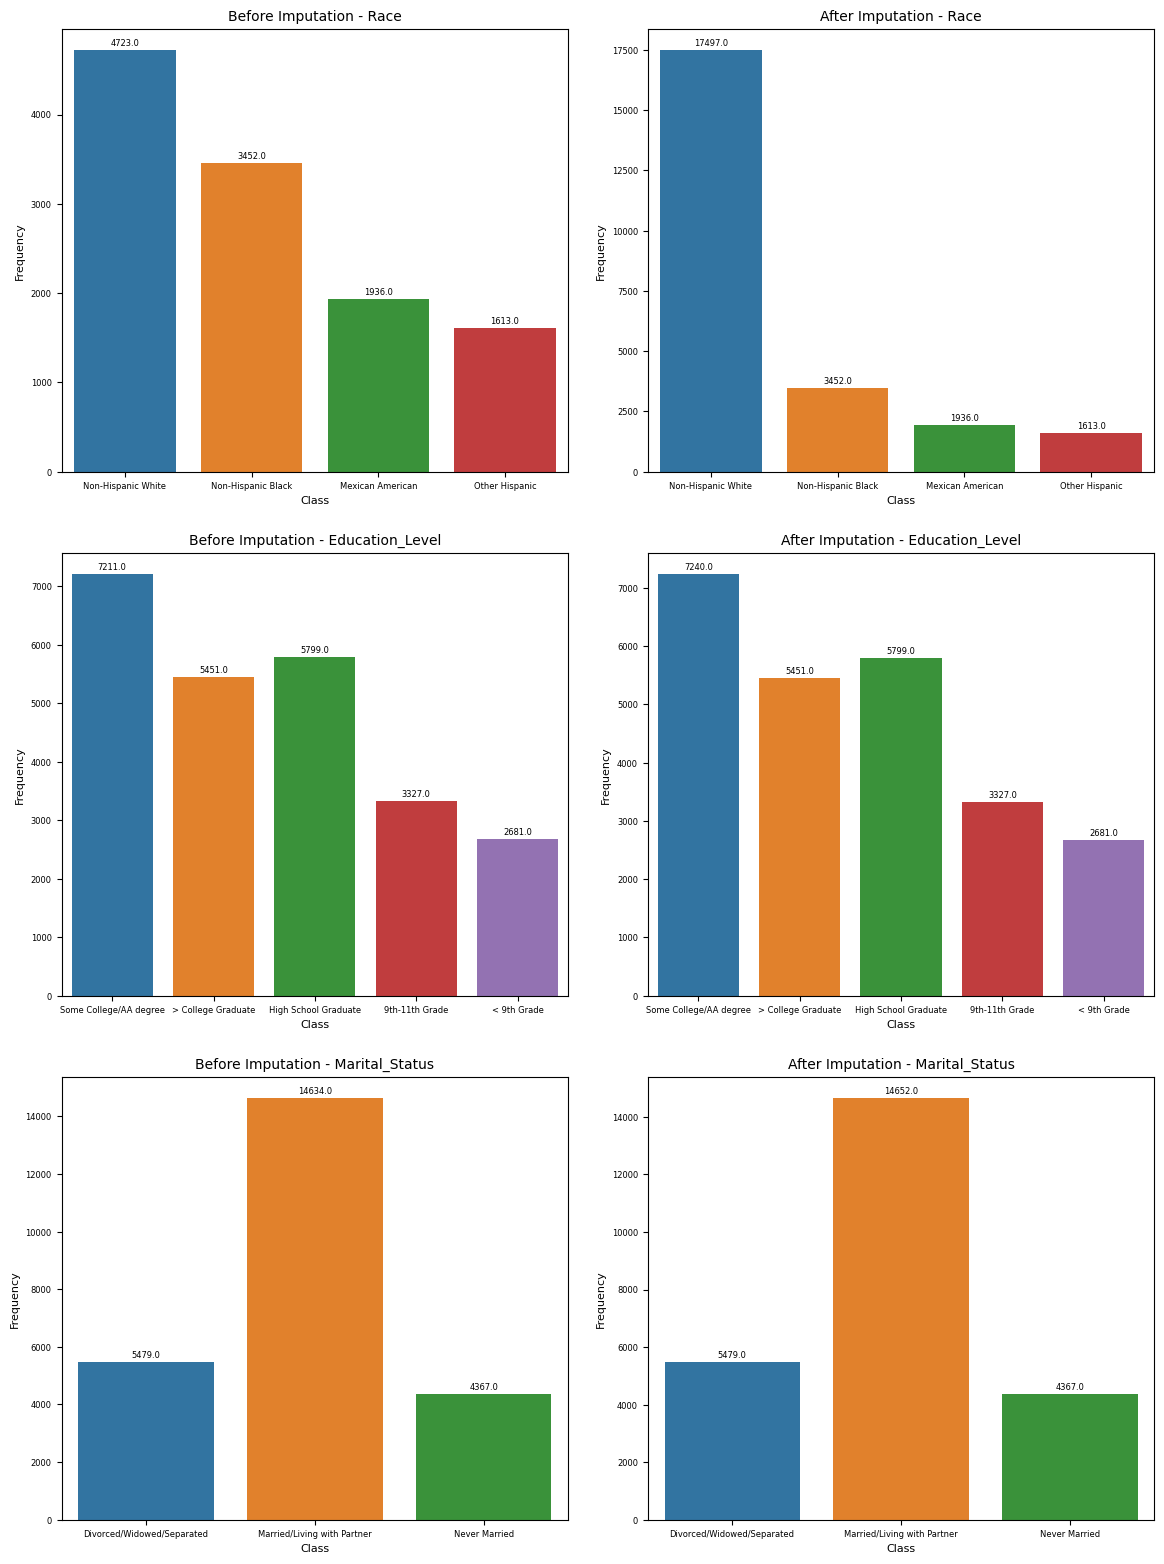

In [ ]:
# Bar plots for discrete features before and after missing value imputation

# Plotting
fig, axs = plt.subplots((len(cat_columns)-1), 2, figsize=(12, len(cat_columns) * 4))

for col in cat_columns[:-1]:
    i = cat_columns.index(col)

    # Bar plot before imputation
    sns.countplot(x=col, data=df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Before Imputation - {col}', fontsize=10)
    axs[i, 0].set_xlabel('Class', fontsize=8)
    axs[i, 0].set_ylabel('Frequency', fontsize=8)
    axs[i, 0].tick_params(axis='both', which='major', labelsize=6)

    # Annotate each bar with its count
    for p in axs[i, 0].patches:
        axs[i, 0].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=6)

    # Bar plot after imputation
    sns.countplot(x=col, data=df_imputed, ax=axs[i, 1])
    axs[i, 1].set_title(f'After Imputation - {col}', fontsize=10)
    axs[i, 1].set_xlabel('Class', fontsize=8)
    axs[i, 1].set_ylabel('Frequency', fontsize=8)
    axs[i, 1].tick_params(axis='both', which='major', labelsize=6)

    # Annotate each bar with its count
    for p in axs[i, 1].patches:
        axs[i, 1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=6)

plt.subplots_adjust(hspace=0.5)

plt.tight_layout(pad=2.0)
plt.show()

In [ ]:
# Get count of missing values

missing_values = [(column, df_imputed[column].isnull().sum()) for column in df_imputed.columns]
missing_values_df = pd.DataFrame(missing_values, columns=['Column', 'MissingValues'])

In [ ]:
# Display columns with missing values

mv = missing_values_df[missing_values_df['MissingValues']>0]
mv

,Column,MissingValues


### Outlier Detection - IQR Method

In [ ]:
"""
Function iterates over a list of numeric columns and calculates the quantiles, IQR and upper and lower limits
"""

def calculate_iqr_limits(df, cols):
  iqr_limits_dict = {}
  for col in cols:
    # min and max
    min = df[col].min()
    max = df[col].max()

    # Quantiles
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.5) # median
    Q3 = df[col].quantile(0.75)

    # IQR range
    IQR = round((Q3 - Q1),2)

    # upper and lower limits
    lower_iqr_limit = round((Q1 - (1.5*IQR)),2)
    upper_iqr_limit = round((Q3 + (1.5*IQR)),2)

    iqr_limits_dict[col] = {'IQR':IQR, 'min': min, 'LowerLimit':lower_iqr_limit, 'Q1':Q1, 'Q2':Q2, 'Q3':Q3, 'max': max, 'UpperLimit':upper_iqr_limit}
  return iqr_limits_dict

In [ ]:
"""
Function iterates over a list of numerical columns and checks and prints outliers based on the IQR calculation perfomed above
"""

def print_outliers(df, iqr_limit_dict):
  outliers_dict = {}
  outliers_total_count = 0
  rows_w_ouliers = set() # if multiple outliers found at the same row index, the row index will only be appended once

  for col, iqr_limits in iqr_limit_dict.items():
    # Get outliers in the column
    outliers_series = df[(df[col] < iqr_limits['LowerLimit']) | (df[col] > iqr_limits['UpperLimit'])][col]

    if not outliers_series.empty:
      outliers_tuple = [(index, value) for index, value in outliers_series.iteritems()]
      outliers_dict[col] = outliers_tuple

    # Get the count of outliers in the column
    outliers_count = len(outliers_series)
    outliers_total_count += outliers_count

    if outliers_count > 0:
      rows_w_ouliers.update(outliers_series.index)
      print(f'Outliers for column {col}:')
      print(outliers_series)
      print(f'Count of outliers in {col}: {outliers_count} \n')

  print(f'Total count of outliers: {outliers_total_count}')
  print(f'Count of rows with at least one outlier: {len(rows_w_ouliers)}')

In [ ]:
calculated_limits_dict = calculate_iqr_limits(df_imputed, continous_columns)
calculated_limits_dict

{'No_of_hours_you_sleep': {'IQR': 2.0,
  'min': 1.0,
  'LowerLimit': 3.0,
  'Q1': 6.0,
  'Q2': 7.0,
  'Q3': 8.0,
  'max': 14.5,
  'UpperLimit': 11.0},
 'Age': {'IQR': 30.0,
  'min': 20,
  'LowerLimit': -11.0,
  'Q1': 34.0,
  'Q2': 50.0,
  'Q3': 64.0,
  'max': 85,
  'UpperLimit': 109.0},
 'PIR': {'IQR': 2.55,
  'min': 0.0,
  'LowerLimit': -2.58,
  'Q1': 1.24,
  'Q2': 2.15,
  'Q3': 3.79,
  'max': 5.0,
  'UpperLimit': 7.62}}

In [ ]:
# # Set up the subplots
# fig, axes = plt.subplots(len(continous_columns), 2, figsize=(20, 20))

# # Plot histplot and boxplot for each column
# for i, column in enumerate(continous_columns):
#     # Plot distplot
#     sns.distplot(df_imputed[column], kde=True, bins = 15, ax=axes[i,0])

#     # Plot boxplot
#     sns.boxplot(x=df_imputed[column], ax=axes[i, 1])

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()

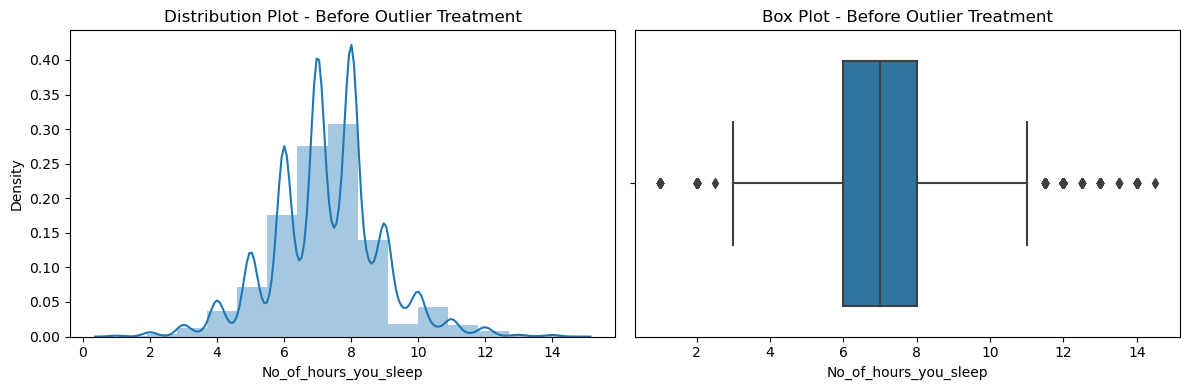

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot distplot
sns.distplot(df_imputed['No_of_hours_you_sleep'], kde=True, bins = 15, ax=axes[0])

axes[0].set_title('Distribution Plot - Before Outlier Treatment')

# Plot boxplot
sns.boxplot(x=df_imputed['No_of_hours_you_sleep'], ax=axes[1])
axes[1].set_title('Box Plot - Before Outlier Treatment')

plt.tight_layout()

# Show the plot
plt.show()

##### Feature 'No_of_hours_you_sleep' has outliers.

#### Outlier Treatment - Feature 'No_of_hours_you_sleep'

In [ ]:
# Get the values between upper limit and maximum for Car_Age
outlier_condition = ((df_imputed['No_of_hours_you_sleep'] >= 1) & (df_imputed['No_of_hours_you_sleep'] < 3)) | ((df_imputed['No_of_hours_you_sleep'] > 11) & (df_imputed['No_of_hours_you_sleep'] <= 14.5))

In [ ]:
df_outlier = df_imputed.copy()

In [ ]:
# Drop outlier values

df_outlier = df_imputed.drop(df_imputed[outlier_condition].index)
df_outlier.reset_index(drop=True, inplace=True)

df_imputed.shape

(24498, 28)

In [ ]:
df_outlier.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Race,Education_Level,Marital_Status,Pregnant,PIR,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,Non-Hispanic White,Some College/AA degree,Divorced/Widowed/Separated,0.0,1.99,No Depression
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,Non-Hispanic White,Some College/AA degree,Married/Living with Partner,0.0,4.65,No Depression
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,Non-Hispanic White,> College Graduate,Married/Living with Partner,0.0,5.00,No Depression
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,Non-Hispanic White,High School Graduate,Married/Living with Partner,0.0,2.15,No Depression
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,Non-Hispanic White,High School Graduate,Never Married,0.0,0.46,No Depression


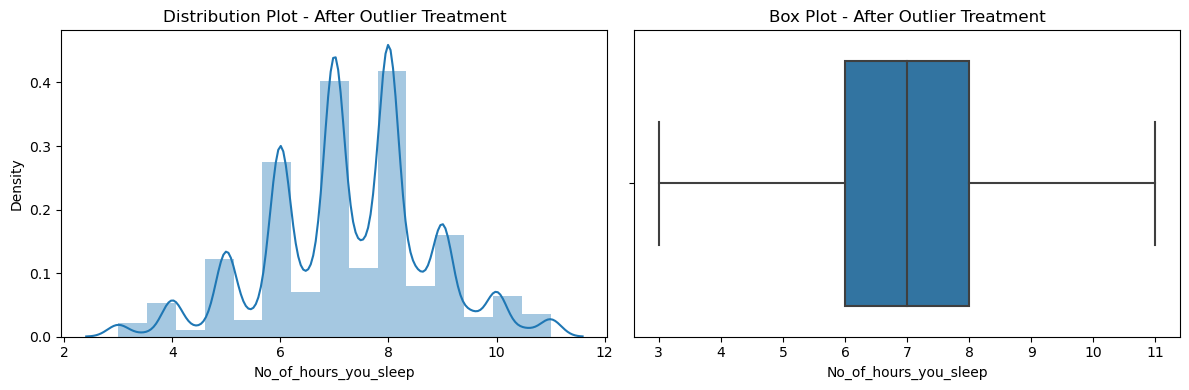

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot distplot
sns.distplot(df_outlier['No_of_hours_you_sleep'], kde=True, bins = 15, ax=axes[0])

axes[0].set_title('Distribution Plot - After Outlier Treatment')

# Plot boxplot
sns.boxplot(x=df_outlier['No_of_hours_you_sleep'], ax=axes[1])
axes[1].set_title('Box Plot - After Outlier Treatment')

plt.tight_layout()

# Show the plot
plt.show()

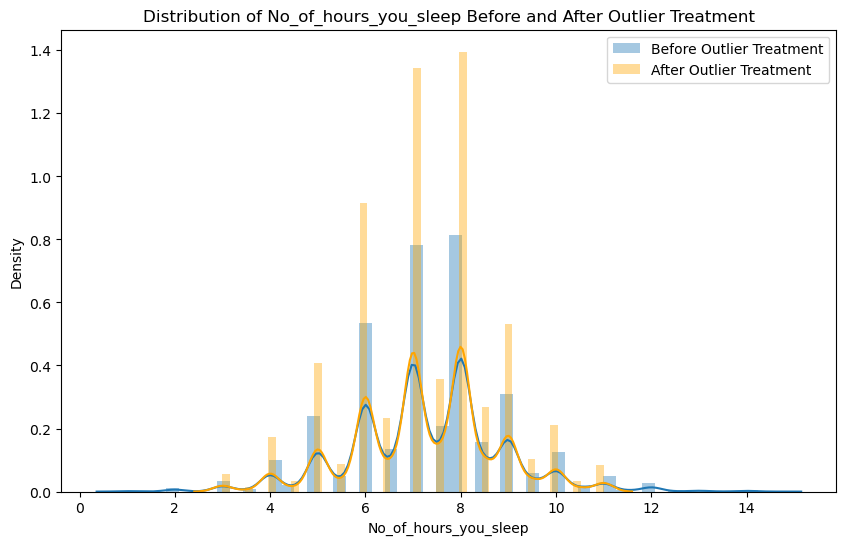

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

sns.distplot(df_imputed['No_of_hours_you_sleep'], label='Before Outlier Treatment')
sns.distplot(df_outlier['No_of_hours_you_sleep'], color='orange', label='After Outlier Treatment')

plt.title('Distribution of No_of_hours_you_sleep Before and After Outlier Treatment')
plt.xlabel('No_of_hours_you_sleep')
plt.ylabel('Density')
plt.legend()

plt.show()

### Feature Encoding

#### Ordinal Encoding - Feature 'Education_Level

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Mapping education levels to integer labels


education_levels = ['< 9th Grade', '9th-11th Grade', 'High School Graduate', 'Some College/AA degree', '> College Graduate']
label_mapping = {level: i for i, level in enumerate(education_levels)}

# Apply label encoding
label_encoder = LabelEncoder()
df_outlier['Education_Level'] = df_outlier['Education_Level'].map(label_mapping)

#### Ordinal Encoding - Feature 'depression_catgeory'

In [ ]:
# Order of levels
depression_categories = ['No Depression', 'Mild Depression', 'Severe Depression']

# Mapping education levels to integer labels
mapping_labels = {level: i for i, level in enumerate(depression_categories)}

# Apply label encoding
label_encoder = LabelEncoder()
df_outlier['depression_category'] = df_outlier['depression_category'].map(mapping_labels)

#### Nominal Encoding - Feature 'Race'

In [ ]:
df_encoded = pd.get_dummies(df_outlier, columns=['Race'], drop_first=True)

#### Nominal Encoding - Feature 'Marital_Status'

In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=['Marital_Status'], drop_first=True)

### Convert Bool to Int datatype

In [ ]:
def convert_bool_to_int(df):
    """ Function to convert bool datatype columns to int """

    for column in df.columns:
        if df[column].dtype == bool:
            df[column] = df[column].astype(int)
    return df

In [ ]:
df_preprocessed = convert_bool_to_int(df_encoded)

In [ ]:
col_to_move = df_preprocessed.pop('depression_category')
df_preprocessed = pd.concat([df_preprocessed, col_to_move], axis=1)

In [ ]:
df_preprocessed.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,How_often_do_you_snore,How_often_do_you_snort/stop_breathing,trouble_sleeping,Sleep_Apnea,Blood_pressure,Taking_Medication_for_HBP,current_drinker,past_drinker,current_smoker,past_smoker,Gender,Age,Education_Level,Pregnant,PIR,Race_Non-Hispanic Black,Race_Non-Hispanic White,Race_Other Hispanic,Marital_Status_Married/Living with Partner,Marital_Status_Never Married,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2,85,3,0.0,1.99,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0,0,2,44,3,0.0,4.65,0,1,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,70,4,0.0,5.00,0,1,0,1,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0,1,73,2,0.0,2.15,0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0,0,1,21,2,0.0,0.46,0,1,0,0,1,0


#### Save to .csv

In [ ]:
df_preprocessed.to_csv('preprocessed_data.csv', index=False)